# Continuous Time FW
## Least squares problem with L1 norm constraints

In [1]:
import numpy as np
from numpy.linalg import norm
from frank_wolfe import FW
import pylab as plt
import pickle

In [2]:
def obj_fun(A, b, z):
    return ((norm(z.T.dot(A.T)-b)**2.))/2.

def dFun(A, Atb, x, alpha):
    Ax = x.T.dot(A.T).ravel()
    grad = (A.T.dot(Ax) - Atb)
    idx_oracle = np.argmax(np.abs(grad))
    mag_oracle = alpha * np.sign(-grad[idx_oracle])
    d = -x.copy()
    d[idx_oracle] += mag_oracle
    return d, grad

def dFun_mom(A, Atb, x,alpha,theta,y,v, gamma):
    y = x * (1.-gamma) + gamma * v
    Ay = y.T.dot(A.T).ravel()
    grady = (A.T.dot(Ay) - Atb)
    theta = theta * (1.-gamma) + gamma * grady
    idx_oracle = np.argmax(np.abs(theta))
    mag_oracle = alpha * np.sign(-theta[idx_oracle])
    v = x*0.
    v[idx_oracle,0] = mag_oracle
    d = v-x
    return d, grady, theta,y,v

In [3]:
sparsity,alpha = 0.1,5000
T=5000
n_samples = 500  #n
n_features = 100 #m
A = np.random.randn(n_samples,n_features)
x_gt = np.random.randn(n_features)
for j in range(len(x_gt)):
    if np.random.rand(1) > sparsity:
        x_gt[j] = 0
noise = np.random.normal(0,0.05,n_samples)## Guassian noise
b = x_gt.T.dot(A.T) + noise
Atb = np.dot(A.T, b)

def obj_fun_2(z) : return obj_fun(A, b, z)
def dFun_2(x, alpha) : return dFun(A, Atb, x, alpha)
def dFun_mom_2(x, alpha, theta, y, v, gamma) : return dFun_mom(A, Atb, x, alpha, theta, y, v, gamma)

line_search = False
disc_type = 'rk44'  # Can be 'FE', 'midpoint', 'rk44', 'rk4', 'rk5'

sol = FW(obj_fun_2, dFun_2, dFun_mom_2, n_features, alpha, T, T, disc_type, line_search, momentum = False, tol=1e-8)


<ipython-input-4-501e4e7b8b16>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
<ipython-input-4-501e4e7b8b16>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,2)
No handles with labels found to put in legend.


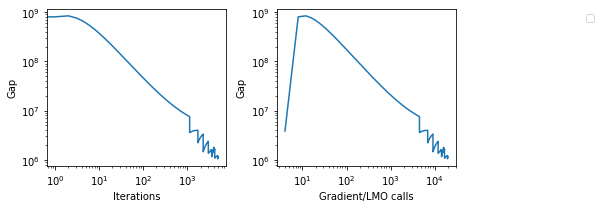

In [4]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(sol[2])

plt.subplot(1,2,2)
plt.plot(sol[1],sol[2])

plt.subplot(1,2,1)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Gap')
plt.subplot(1,2,2)

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Gradient/LMO calls')
plt.ylabel('Gap')
plt.legend(bbox_to_anchor=(1.8, 1), loc='upper right', ncol=1)

plt.tight_layout()